In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import metrics
import seaborn as sn

In [2]:
#read features from csv file
df = pd.read_csv('features.csv')
df.set_index('filename', inplace=True)

In [3]:
#label encoding
# genre_list = df['genre']
# encoder = LabelEncoder()
# y = encoder.fit_transform(genre_list)
y = df['genre']

#scaling the features
# scaler = StandardScaler()
# X = scaler.fit_transform(np.array(df.iloc[:, 2:], dtype=float))
X = df.iloc[:, 1:]

#training/testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
#SVM
clf = svm.SVC(kernel='linear', C=10, gamma='auto')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
    
print('Precision: {0:.3f}%'.format(metrics.precision_score(y_test, y_pred, average='micro') * 100))
print('Recall: {0:.3f}%'.format(metrics.recall_score(y_test, y_pred, average='micro') * 100))
print('Accuracy: {0:.3f}%'.format(metrics.accuracy_score(y_test, y_pred) * 100))
print('Predicted values:\n {}'.format(y_pred))

Precision: 61.500%
Recall: 61.500%
Accuracy: 61.500%
Predicted values:
 ['hiphop' 'country' 'reggae' 'pop' 'blues' 'reggae' 'country' 'metal'
 'disco' 'rock' 'jazz' 'blues' 'blues' 'reggae' 'hiphop' 'classical'
 'country' 'metal' 'rock' 'metal' 'metal' 'rock' 'hiphop' 'country'
 'classical' 'jazz' 'country' 'pop' 'metal' 'metal' 'country' 'blues'
 'reggae' 'reggae' 'blues' 'classical' 'disco' 'pop' 'jazz' 'country'
 'hiphop' 'hiphop' 'jazz' 'disco' 'reggae' 'blues' 'blues' 'country'
 'country' 'metal' 'hiphop' 'metal' 'disco' 'rock' 'blues' 'country'
 'disco' 'classical' 'pop' 'hiphop' 'rock' 'hiphop' 'rock' 'blues' 'disco'
 'metal' 'disco' 'pop' 'hiphop' 'metal' 'country' 'country' 'classical'
 'rock' 'metal' 'classical' 'classical' 'classical' 'metal' 'rock' 'disco'
 'rock' 'classical' 'country' 'classical' 'blues' 'classical' 'blues'
 'jazz' 'classical' 'classical' 'jazz' 'country' 'reggae' 'metal' 'reggae'
 'reggae' 'pop' 'blues' 'hiphop' 'disco' 'country' 'disco' 'rock' 'rock'
 'c

In [6]:
y_pred = clf.predict(X_test)

In [7]:
print('Precision: {0:.3f}%'.format(metrics.precision_score(y_test, y_pred, average='micro') * 100))
print('Recall: {0:.3f}%'.format(metrics.recall_score(y_test, y_pred, average='micro') * 100))
print('Accuracy: {0:.3f}%'.format(metrics.accuracy_score(y_test, y_pred) * 100))
print('Predicted values:\n {}'.format(y_pred))

Precision: 61.500%
Recall: 61.500%
Accuracy: 61.500%
Predicted values:
 ['hiphop' 'country' 'reggae' 'pop' 'blues' 'reggae' 'country' 'metal'
 'disco' 'rock' 'jazz' 'blues' 'blues' 'reggae' 'hiphop' 'classical'
 'country' 'metal' 'rock' 'metal' 'metal' 'rock' 'hiphop' 'country'
 'classical' 'jazz' 'country' 'pop' 'metal' 'metal' 'country' 'blues'
 'reggae' 'reggae' 'blues' 'classical' 'disco' 'pop' 'jazz' 'country'
 'hiphop' 'hiphop' 'jazz' 'disco' 'reggae' 'blues' 'blues' 'country'
 'country' 'metal' 'hiphop' 'metal' 'disco' 'rock' 'blues' 'country'
 'disco' 'classical' 'pop' 'hiphop' 'rock' 'hiphop' 'rock' 'blues' 'disco'
 'metal' 'disco' 'pop' 'hiphop' 'metal' 'country' 'country' 'classical'
 'rock' 'metal' 'classical' 'classical' 'classical' 'metal' 'rock' 'disco'
 'rock' 'classical' 'country' 'classical' 'blues' 'classical' 'blues'
 'jazz' 'classical' 'classical' 'jazz' 'country' 'reggae' 'metal' 'reggae'
 'reggae' 'pop' 'blues' 'hiphop' 'disco' 'country' 'disco' 'rock' 'rock'
 'c

In [8]:
#mean accuracy
clf.score(X_train, y_train)

0.885

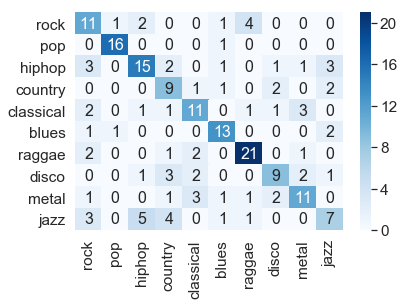

In [9]:
#confusion matrix using seaborn and matplotlib
#found on stackoverflow https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
genres = ['rock', 'pop', 'hiphop', 'country', 'classical', 'blues', 'raggae', 'disco', 'metal', 'jazz']

#create confusion matrix using scikitlearn.metrics
cm = metrics.confusion_matrix(y_test, y_pred)

#create a dataframe confusion matric
df_cm = pd.DataFrame(cm, genres,
                  genres)
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap="Blues")# font size

In [10]:
#classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       blues       0.48      0.58      0.52        19
   classical       0.89      0.94      0.91        17
     country       0.62      0.58      0.60        26
       disco       0.43      0.60      0.50        15
      hiphop       0.58      0.55      0.56        20
        jazz       0.68      0.76      0.72        17
       metal       0.75      0.78      0.76        27
         pop       0.60      0.50      0.55        18
      reggae       0.61      0.55      0.58        20
        rock       0.47      0.33      0.39        21

   micro avg       0.61      0.61      0.61       200
   macro avg       0.61      0.62      0.61       200
weighted avg       0.62      0.61      0.61       200



In [21]:
#now to try with some outside data
new_data = pd.read_csv("demo_features.csv")

X = new_data.iloc[:, 1:]
y_pred = clf.predict(X)
print('Predicted values:\n {}'.format(y_pred))

Predicted values:
 ['hiphop' 'jazz' 'pop']
